In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:
systems = ['clickhouse', 'duckdb', 'hyper', 'monetdb'] # 'gnu', 'umbra'
sfs = [1] # 10, 100, 300

In [63]:
def collect_randints(systems):
    dfs = []
    for system in systems:
        df = pd.read_csv(f'../results/{system}/randints/results.csv', header=None, names=['query', 'time'])
        df['system'] = system
        dfs.append(df)
    result = pd.concat(dfs)
    result.reset_index(inplace=True, drop=True)
    return result

In [110]:
randints_df = collect_randints(systems)

asc_desc_df = randints_df[(randints_df['query'] == '100_asc') | (randints_df['query'] == '100_desc') | (randints_df['query'] == '100')]
asc_desc_df = asc_desc_df.groupby(['system', 'query']).median().reset_index()

randints_df = randints_df[(randints_df['query'] != '100_asc') & (randints_df['query'] != '100_desc')]
randints_df['query'] = pd.to_numeric(randints_df['query'])
randints_df = randints_df.groupby(['system', 'query']).median().reset_index()

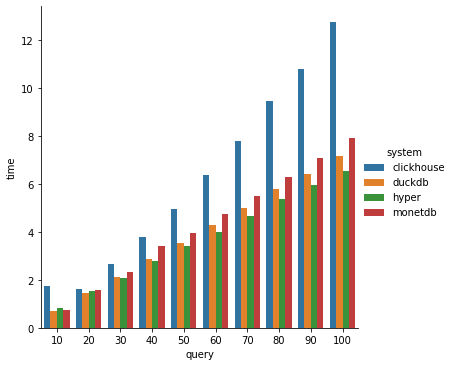

In [111]:
plot = sns.catplot(data=randints_df, kind='bar', x='query', y='time', hue='system')

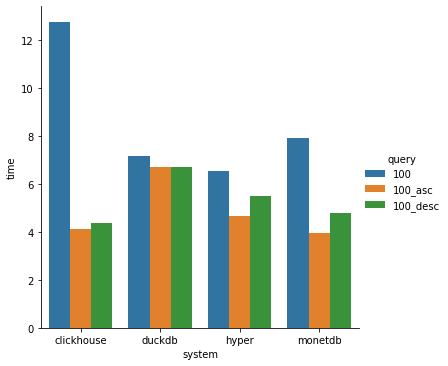

In [112]:
plot = sns.catplot(data=asc_desc_df, kind='bar', x='system', y='time', hue='query')

In [90]:
def collect_tpcds_customer(systems, sfs):
    dfs = []
    for system in systems:
        for sf in sfs:
            df = pd.read_csv(f'../results/{system}/tpcds/sf{sf}/customer/results.csv', header=None, names=['query', 'time'])
            df['system'] = system
            df['sf'] = sf
            dfs.append(df)
    result = pd.concat(dfs)
    result.reset_index(inplace=True, drop=True)
    return result

In [91]:
customer_df = collect_tpcds_customer(systems, sfs)

customer_int_df = customer_df[customer_df['query'].str.contains('int')].reset_index(drop=True)
customer_int_df['query'] = customer_int_df['query'].apply(lambda q: q.replace('int', ''))
customer_int_df['query'] = pd.to_numeric(customer_int_df['query'])
customer_int_df = customer_int_df.groupby(['system', 'query', 'sf']).median().reset_index()

customer_varchar_df = customer_df[customer_df['query'].str.contains('varchar')].reset_index(drop=True)
customer_varchar_df['query'] = customer_varchar_df['query'].apply(lambda q: q.replace('varchar', ''))
customer_varchar_df['query'] = pd.to_numeric(customer_varchar_df['query'])
customer_varchar_df = customer_varchar_df.groupby(['system', 'query', 'sf']).median().reset_index()

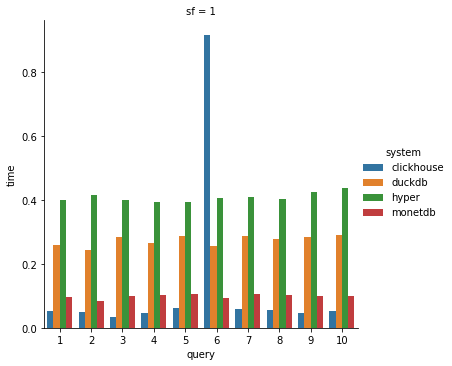

In [92]:
plot = sns.catplot(data=customer_int_df, col='sf', kind='bar', x='query', y='time', hue='system')

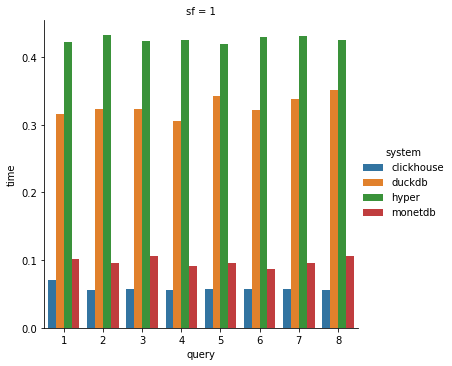

In [93]:
plot = sns.catplot(data=customer_varchar_df, col='sf', kind='bar', x='query', y='time', hue='system')

In [94]:
def collect_tpcds_catalog_sales(systems, sfs):
    dfs = []
    for system in systems:
        for sf in sfs:
            df = pd.read_csv(f'../results/{system}/tpcds/sf{sf}/catalog_sales/results.csv', header=None, names=['query', 'time'])
            df['system'] = system
            df['sf'] = sf
            dfs.append(df)
    result = pd.concat(dfs)
    result.reset_index(inplace=True, drop=True)
    return result

In [99]:
catalog_sales_df = collect_tpcds_catalog_sales(systems, sfs)

catalog_sales_payload_df = catalog_sales_df[catalog_sales_df['query'].str.contains('payload')].reset_index(drop=True)
catalog_sales_payload_df['query'] = catalog_sales_payload_df['query'].apply(lambda q: q.replace('payload', ''))
catalog_sales_payload_df['query'] = pd.to_numeric(catalog_sales_payload_df['query'])
catalog_sales_payload_df = catalog_sales_payload_df.groupby(['system', 'query', 'sf']).median().reset_index()

catalog_sales_sorting_df = catalog_sales_df[catalog_sales_df['query'].str.contains('sorting')].reset_index(drop=True)
catalog_sales_sorting_df['query'] = catalog_sales_sorting_df['query'].apply(lambda q: q.replace('sorting', ''))
catalog_sales_sorting_df['query'] = pd.to_numeric(catalog_sales_sorting_df['query'])
catalog_sales_sorting_df = catalog_sales_sorting_df.groupby(['system', 'query', 'sf']).median().reset_index()

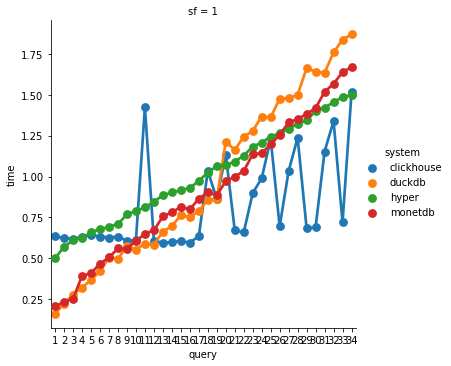

In [107]:
plot = sns.catplot(data=catalog_sales_payload_df, col='sf', kind='point', x='query', y='time', hue='system')

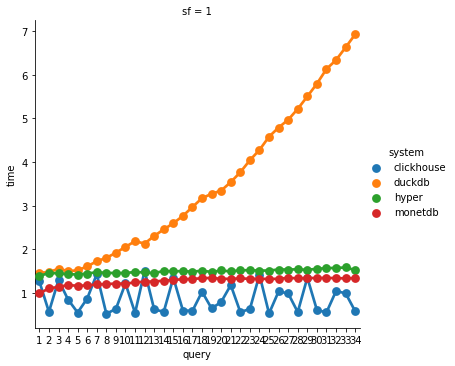

In [108]:
plot = sns.catplot(data=catalog_sales_sorting_df, col='sf', kind='point', x='query', y='time', hue='system')